In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Copy of data-bank.csv'
data = pd.read_csv(file_path, encoding='latin1')
display(data.head())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Cleaning Dataset

In [5]:
# Biar data asli tetap aman
df = data.copy()

# Hilangkan spasi di awal/akhir nama kolom
df.columns = df.columns.str.strip()

# Cek lagi beberapa kolom awal
df.columns[:10]


Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue'],
      dtype='object')

In [6]:
df = df.rename(columns={'Bankrupt?': 'bankrupt'})


In [7]:
# Cek tipe data
df.dtypes.head()

# Cek apakah ada missing values
df.isna().sum().sum()   # total missing di seluruh tabel

# Cek duplikasi baris
df.duplicated().sum()


np.int64(0)

In [8]:
# Pastikan kolom numeric (harusnya sudah numeric semua)
num_cols = df.columns.drop('bankrupt')
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Double check lagi kalau ada NaN setelah coercing (harusnya 0)
print("Total NaN setelah coercing:", df.isna().sum().sum())

# Pisah fitur dan target
X = df.drop('bankrupt', axis=1)
y = df['bankrupt']

X.shape, y.shape


Total NaN setelah coercing: 0


((6819, 95), (6819,))

In [9]:
y.value_counts()
y.value_counts(normalize=True)


,proportion
bankrupt,
0,0.967737
1,0.032263


### Data Understanding / EDA


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biar tampilannya cakep
plt.style.use('seaborn-v0_8')
sns.set(font_scale=0.9)

# Copy data asli
df = data.copy()

# Bersihin nama kolom (hilangin spasi di depan)
df.columns = df.columns.str.strip()

# Rename target biar simpel
df = df.rename(columns={'Bankrupt?': 'bankrupt'})

df.head()


,bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

bankrupt
0    6599
1     220
Name: count, dtype: int64

Proporsi masing-masing kelas:
bankrupt
0    0.967737
1    0.032263
Name: proportion, dtype: float64


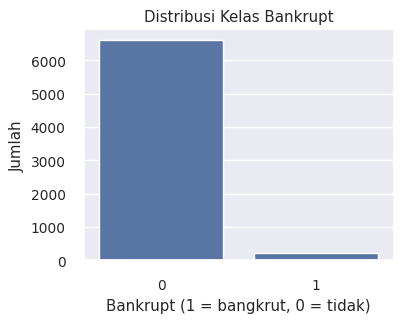

In [12]:
# Jumlah masing-masing kelas
print(df['bankrupt'].value_counts())
print('\nProporsi masing-masing kelas:')
print(df['bankrupt'].value_counts(normalize=True))

# Visualisasi
plt.figure(figsize=(4,3))
sns.countplot(x='bankrupt', data=df)
plt.title('Distribusi Kelas Bankrupt')
plt.xlabel('Bankrupt (1 = bangkrut, 0 = tidak)')
plt.ylabel('Jumlah')
plt.show()


In [13]:
import numpy as np

# Korelasi semua fitur numerik dengan target
corr_target = df.corr(numeric_only=True)['bankrupt'].drop('bankrupt')

# Urutkan berdasarkan nilai absolut (paling kuat di atas)
corr_target_sorted = corr_target.sort_values(key=np.abs, ascending=False)

# Lihat 10 fitur paling berkorelasi
corr_target_sorted.head(10)


,bankrupt
Net Income to Total Assets,-0.315457
ROA(A) before interest and % after tax,-0.282941
ROA(B) before interest and depreciation after tax,-0.273051
ROA(C) before interest and depreciation before interest,-0.260807
Net worth/Assets,-0.250161
Debt ratio %,0.250161
Persistent EPS in the Last Four Seasons,-0.219560
Retained Earnings to Total Assets,-0.217779
Net profit before tax/Paid-in capital,-0.207857
Per Share Net profit before tax (Yuan Â¥),-0.201395


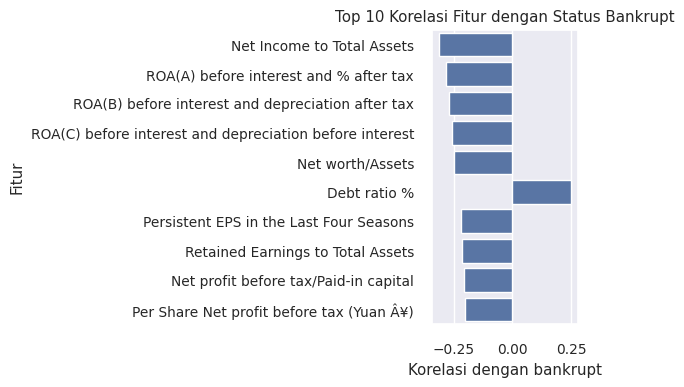

In [14]:
top_features = corr_target_sorted.head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Korelasi Fitur dengan Status Bankrupt')
plt.xlabel('Korelasi dengan bankrupt')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


In [15]:
df['bankrupt_label'] = df['bankrupt'].map({0: 'Not Bankrupt', 1: 'Bankrupt'})


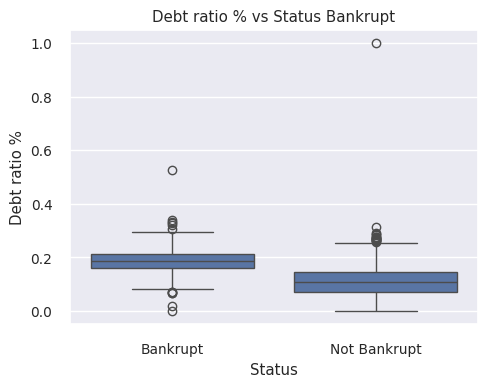

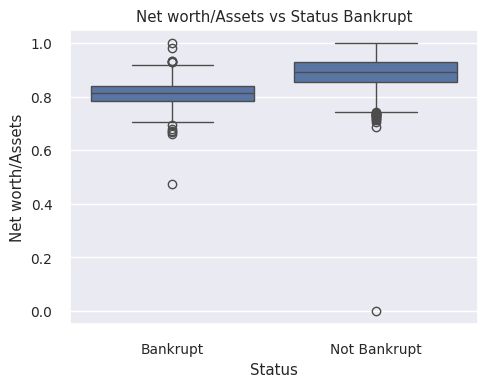

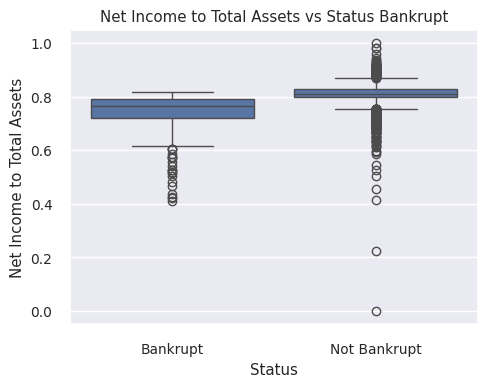

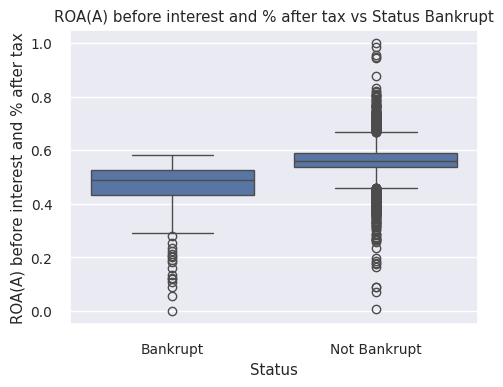

In [16]:
features_to_plot = [
    'Debt ratio %',
    'Net worth/Assets',
    'Net Income to Total Assets',
    'ROA(A) before interest and % after tax'
]

for col in features_to_plot:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='bankrupt_label', y=col, data=df)
    plt.title(f'{col} vs Status Bankrupt')
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


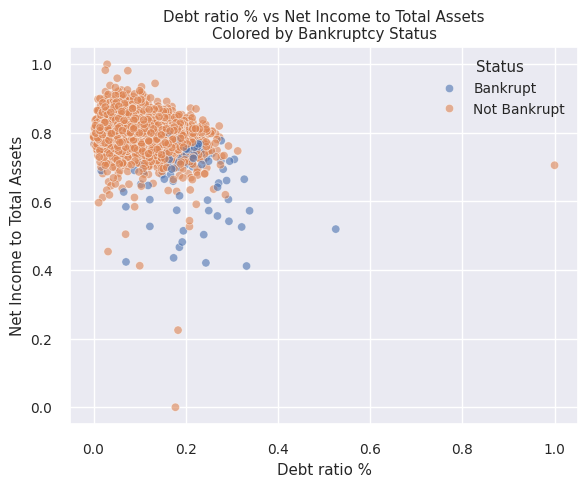

In [17]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x='Debt ratio %',
    y='Net Income to Total Assets',
    hue='bankrupt_label',
    alpha=0.6
)
plt.title('Debt ratio % vs Net Income to Total Assets\nColored by Bankruptcy Status')
plt.xlabel('Debt ratio %')
plt.ylabel('Net Income to Total Assets')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


### Data Preparation


In [18]:
df = data.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Bankrupt?': 'bankrupt'})

X = df.drop('bankrupt', axis=1)
y = df['bankrupt']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # penting karena data imbalanced
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)

print("\nDistribusi kelas di y_train:")
print(y_train.value_counts())
print("\nProporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))


Train shape: (5455, 95) (5455,)
Test shape : (1364, 95) (1364,)

Distribusi kelas di y_train:
bankrupt
0    5279
1     176
Name: count, dtype: int64

Proporsi kelas di y_train:
bankrupt
0    0.967736
1    0.032264
Name: proportion, dtype: float64


In [20]:
!pip install imbalanced-learn


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("\nSesudah SMOTE:", y_train_smote.value_counts())


Sebelum SMOTE: bankrupt
0    5279
1     176
Name: count, dtype: int64

Sesudah SMOTE: bankrupt
0    5279
1    5279
Name: count, dtype: int64


### Scaling data


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler di data TRAIN (setelah SMOTE) lalu transform
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Test TIDAK di-SMOTE, tapi tetap di-scale pakai scaler yang sama
X_test_scaled = scaler.transform(X_test)

print("X_train_smote_scaled shape:", X_train_smote_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_smote_scaled shape: (10558, 95)
X_test_scaled shape: (1364, 95)


### Training Model

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score
)


In [24]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print("="*60)
    print(f"MODEL: {name}")
    print("="*60)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Akurasi
    print(f"Train Accuracy : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test  Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

    # Classification report
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['Not Bankrupt (0)', 'Bankrupt (1)'])
    disp.plot(values_format='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC AUC (kalau bisa dapat probability)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC (Test): {auc:.4f}")
    print("\n")


### Decision Tree

MODEL: Decision Tree
Train Accuracy : 1.0000
Test  Accuracy : 0.9318

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.9865    0.9424    0.9640      1320
           1     0.2621    0.6136    0.3673        44

    accuracy                         0.9318      1364
   macro avg     0.6243    0.7780    0.6657      1364
weighted avg     0.9632    0.9318    0.9447      1364



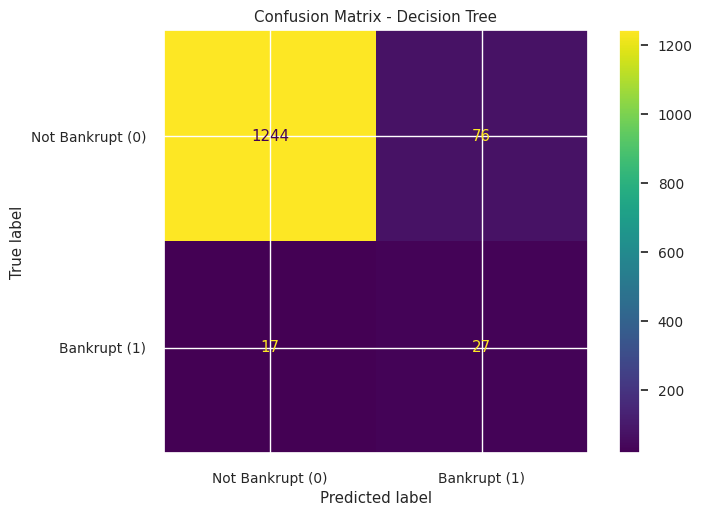

ROC AUC (Test): 0.7780




In [25]:
dt_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,      # bisa lu tuning misal 5, 8, 10
    min_samples_split=2,
    min_samples_leaf=1
)

dt_clf.fit(X_train_smote, y_train_smote)

evaluate_model("Decision Tree", dt_clf, X_train_smote, y_train_smote, X_test, y_test)


### Random Forest

MODEL: Random Forest
Train Accuracy : 1.0000
Test  Accuracy : 0.9611

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.9862    0.9735    0.9798      1320
           1     0.4262    0.5909    0.4952        44

    accuracy                         0.9611      1364
   macro avg     0.7062    0.7822    0.7375      1364
weighted avg     0.9681    0.9611    0.9642      1364



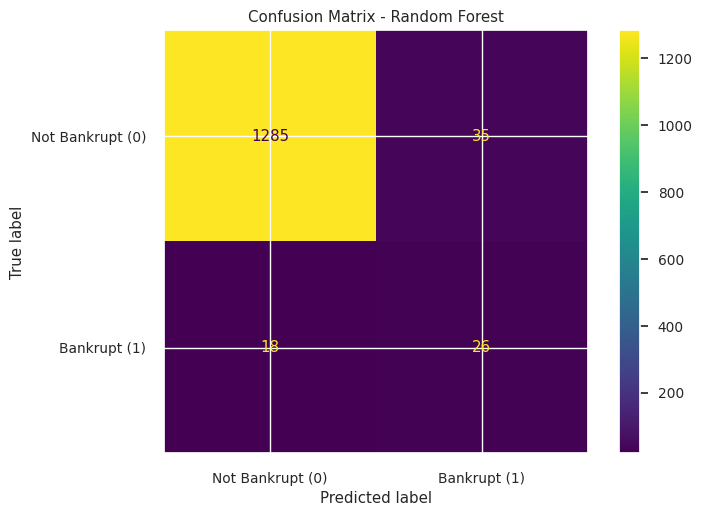

ROC AUC (Test): 0.9450




In [26]:
rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_depth=None      # bisa lu batasi kalau mau
)

rf_clf.fit(X_train_smote, y_train_smote)

evaluate_model("Random Forest", rf_clf, X_train_smote, y_train_smote, X_test, y_test)


### Artificial Neural Network (MLPClassifier)

MODEL: Artificial Neural Network
Train Accuracy : 1.0000
Test  Accuracy : 0.9560

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.9802    0.9742    0.9772      1320
           1     0.3462    0.4091    0.3750        44

    accuracy                         0.9560      1364
   macro avg     0.6632    0.6917    0.6761      1364
weighted avg     0.9597    0.9560    0.9578      1364



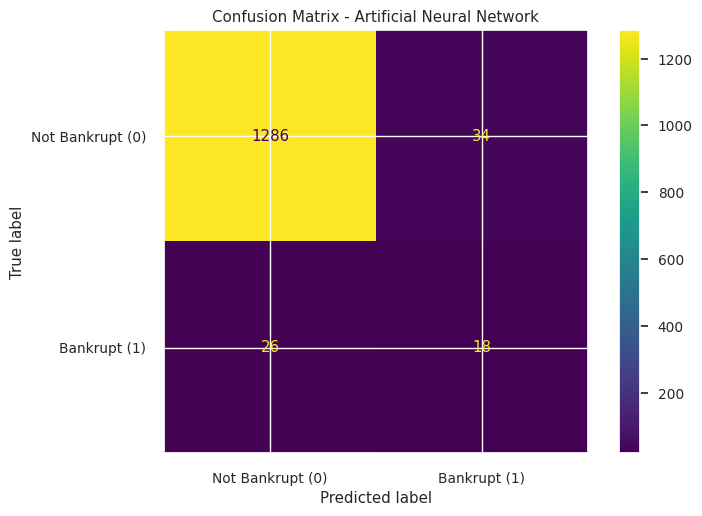

ROC AUC (Test): 0.8033




In [27]:
ann_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # 2 hidden layer: 64 & 32 neuron
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

ann_clf.fit(X_train_smote_scaled, y_train_smote)

evaluate_model("Artificial Neural Network", ann_clf,
               X_train_smote_scaled, y_train_smote,
               X_test_scaled, y_test)


### top5.index

In [28]:
import pandas as pd

feature_importances = pd.Series(
    rf_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Lihat 10 besar dulu
feature_importances.head(10)


,0
Continuous interest rate (after tax),0.058452
Total debt/Total net worth,0.058276
Persistent EPS in the Last Four Seasons,0.050704
After-tax net Interest Rate,0.049656
Net Income to Total Assets,0.047730
Retained Earnings to Total Assets,0.045263
Borrowing dependency,0.041861
Net worth/Assets,0.029136
Debt ratio %,0.027604
Net Income to Stockholder's Equity,0.026424


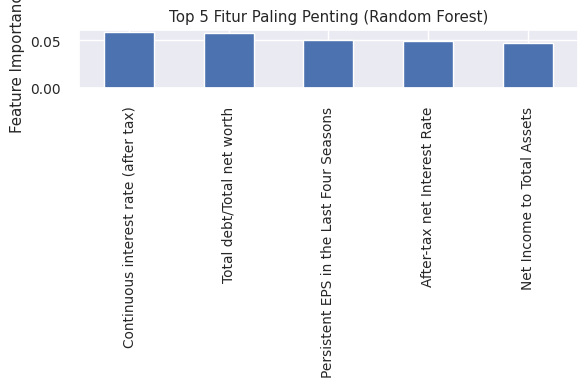

In [29]:
top5 = feature_importances.head(5)

plt.figure(figsize=(6,4))
top5.plot(kind='bar')
plt.title('Top 5 Fitur Paling Penting (Random Forest)')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.show()
